## Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings? And can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

pd.options.display.max_columns = 500
pd.options.display.max_rows = 50

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0b53925c-23a8-4464-960a-85da02d0a002',
    'IBM_API_KEY_ID': '4rIPnHhlOzbD0vsq_ttrOMnwWi4n4zm8UEfl9qns01Xq',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'saeyoonoh-donotdelete-pr-kkixtxvuwsvuum',
    'FILE': 'fhrw-4uyv.csv'}

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c79194d44692440ea25fe7579ee6c20c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4rIPnHhlOzbD0vsq_ttrOMnwWi4n4zm8UEfl9qns01Xq',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c79194d44692440ea25fe7579ee6c20c.get_object(Bucket='saeyoonoh-donotdelete-pr-kkixtxvuwsvuum',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_complaint = pd.read_csv(body)
print(df_complaint.shape)
df_complaint.head()

(5984816, 15)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-03T11:22:36.000,45306898,UNSANITARY CONDITION,10457.0,2105 RYER AVENUE,RYER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.853390,-73.900691,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-03T08:55:39.000,45307155,HEAT/HOT WATER,11230.0,820 EAST 10 STREET,EAST 10 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.629031,-73.967011,2020-01-03T15:31:14.000,RESIDENTIAL BUILDING,Closed
2,2020-01-03T14:32:20.000,45306674,HEAT/HOT WATER,11207.0,645 BRADFORD STREET,BRADFORD STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.662724,-73.889365,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-03T12:17:28.000,45306793,HEAT/HOT WATER,10455.0,725 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.814229,-73.898394,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-03T09:39:04.000,45307220,HEAT/HOT WATER,11230.0,716 OCEAN PARKWAY,OCEAN PARKWAY,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.631058,-73.971780,NaN,RESIDENTIAL BUILDING,Open


### 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

#### 1) type of complaint analysis

In [4]:
# 문제 type of complaint을 보여주는 "complaint_type"을 분석한다
# 총 이러한 complaint_type이 존재하고 있으며 컴플레인의 수는 30개이다
print("Total Complaint Type : " , len(df_complaint["complaint_type"].unique()))

# 약 60만개의 데이터셋 중에 HEAT/HOT WATER가 12만건 이상을 차지하며 20% 이상 차지하고 있음.
df_complaint["complaint_type"].value_counts()

Total Complaint Type :  30


HEAT/HOT WATER            1237037
HEATING                    887869
PLUMBING                   709485
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       448937
PAINT - PLASTER            361257
PAINT/PLASTER              345418
ELECTRIC                   306537
NONCONST                   260890
DOOR/WINDOW                204211
WATER LEAK                 192624
GENERAL                    150432
FLOORING/STAIRS            136990
APPLIANCE                  112192
HPD Literature Request      52830
SAFETY                      51236
OUTSIDE BUILDING             7114
ELEVATOR                     6674
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric      

In [5]:
# 위에서 중복되거나 약간의 변형이 있는 type들이 있는데 그것을 파악한다
# 년도별로 차이가 단어가 바뀌어서 들어갔을 수도 있음으로 연도로 파악해본다
df_complaint["created_date"] = pd.to_datetime(df_complaint["created_date"])
df_complaint["year"] = df_complaint["created_date"].dt.year


# HEAT이 들어간 두개의 경우 날짜 년도가 다르다/ 즉 2014년까지는 HEATING으로 표기를 했지만 
# 그 이후부터 2020년까지는 HEAT/HOT WATER로 표기를 하였다는 말임
print("Year of HEAT/HOT WATER : ", 
      df_complaint[df_complaint["complaint_type"] == "HEAT/HOT WATER"]["year"].unique())
print("Year of HEATING : ", 
      df_complaint[df_complaint["complaint_type"] == "HEATING"]["year"].unique())


print("------------------------------------------------------")


# 이 경우는 2013, 2014년까지는 혼용해서 쓰다가 
#  -> 2014년 말이나 2015년 초부터 PAINT/PLASTER로 통일해서 썼다는 것을 예측해볼 수 있다.
print("Year of PAINT/PLASTER : ", 
      df_complaint[df_complaint["complaint_type"] == "PAINT/PLASTER"]["year"].unique())
print("Year of PAINT - PLASTER : ", 
      df_complaint[df_complaint["complaint_type"] == "PAINT - PLASTER"]["year"].unique())

# 이 밖에 Plumbing / PLUMBING 등 대소문자로 인해 별개로 구분되는 경우도 있다. 
# 이에 원래는 모든걸 다 합쳐봐야 하나, 문제의 조건은 가장 큰 경우의 수를 체크하는 경우로 HEATING을 체크한다

Year of HEAT/HOT WATER :  [2020 2019 2018 2014 2015 2017 2016]
Year of HEATING :  [2012 2011 2010 2013 2014]
------------------------------------------------------
Year of PAINT/PLASTER :  [2020 2019 2012 2018 2016 2014 2015 2017 2013]
Year of PAINT - PLASTER :  [2011 2012 2013 2014 2010]


#### 2) fix complaint_type

In [6]:
# 문제를 해결하기 위해 HEAT/HOT WATER와 HEATING을 합친다

df_complaint.loc[df_complaint["complaint_type"] == "HEATING", "complaint_type"] = "HEAT/HOT WATER"
# df_complaint["complaint_type"].value_counts()

#### 3) proportion(비율) of "HEAT/HOT WATER" and others

In [7]:
# 각 type별로 비율이 어느정도 되는지 파악을 해본다

total_complaint_type = df_complaint["complaint_type"].count()
number_complaint = df_complaint["complaint_type"].value_counts()

proportion = [(value / total_complaint_type) for value in number_complaint]

# 결과 HEAT/HOT WATER가 약 35%의 complaint을 가지고 있음을 알 수 있다 
for i, pro in enumerate(proportion):
    print(number_complaint.index.values[i], ":", f"{pro:.3f}")

HEAT/HOT WATER : 0.355
PLUMBING : 0.119
GENERAL CONSTRUCTION : 0.084
UNSANITARY CONDITION : 0.075
PAINT - PLASTER : 0.060
PAINT/PLASTER : 0.058
ELECTRIC : 0.051
NONCONST : 0.044
DOOR/WINDOW : 0.034
WATER LEAK : 0.032
GENERAL : 0.025
FLOORING/STAIRS : 0.023
APPLIANCE : 0.019
HPD Literature Request : 0.009
SAFETY : 0.009
OUTSIDE BUILDING : 0.001
ELEVATOR : 0.001
Unsanitary Condition : 0.001
CONSTRUCTION : 0.001
General : 0.000
Safety : 0.000
STRUCTURAL : 0.000
Plumbing : 0.000
AGENCY : 0.000
VACANT APARTMENT : 0.000
Outside Building : 0.000
Appliance : 0.000
Mold : 0.000
Electric : 0.000


#### 4) visualization(시각화) 

(162, 3)
(149, 3)
(13, 3)


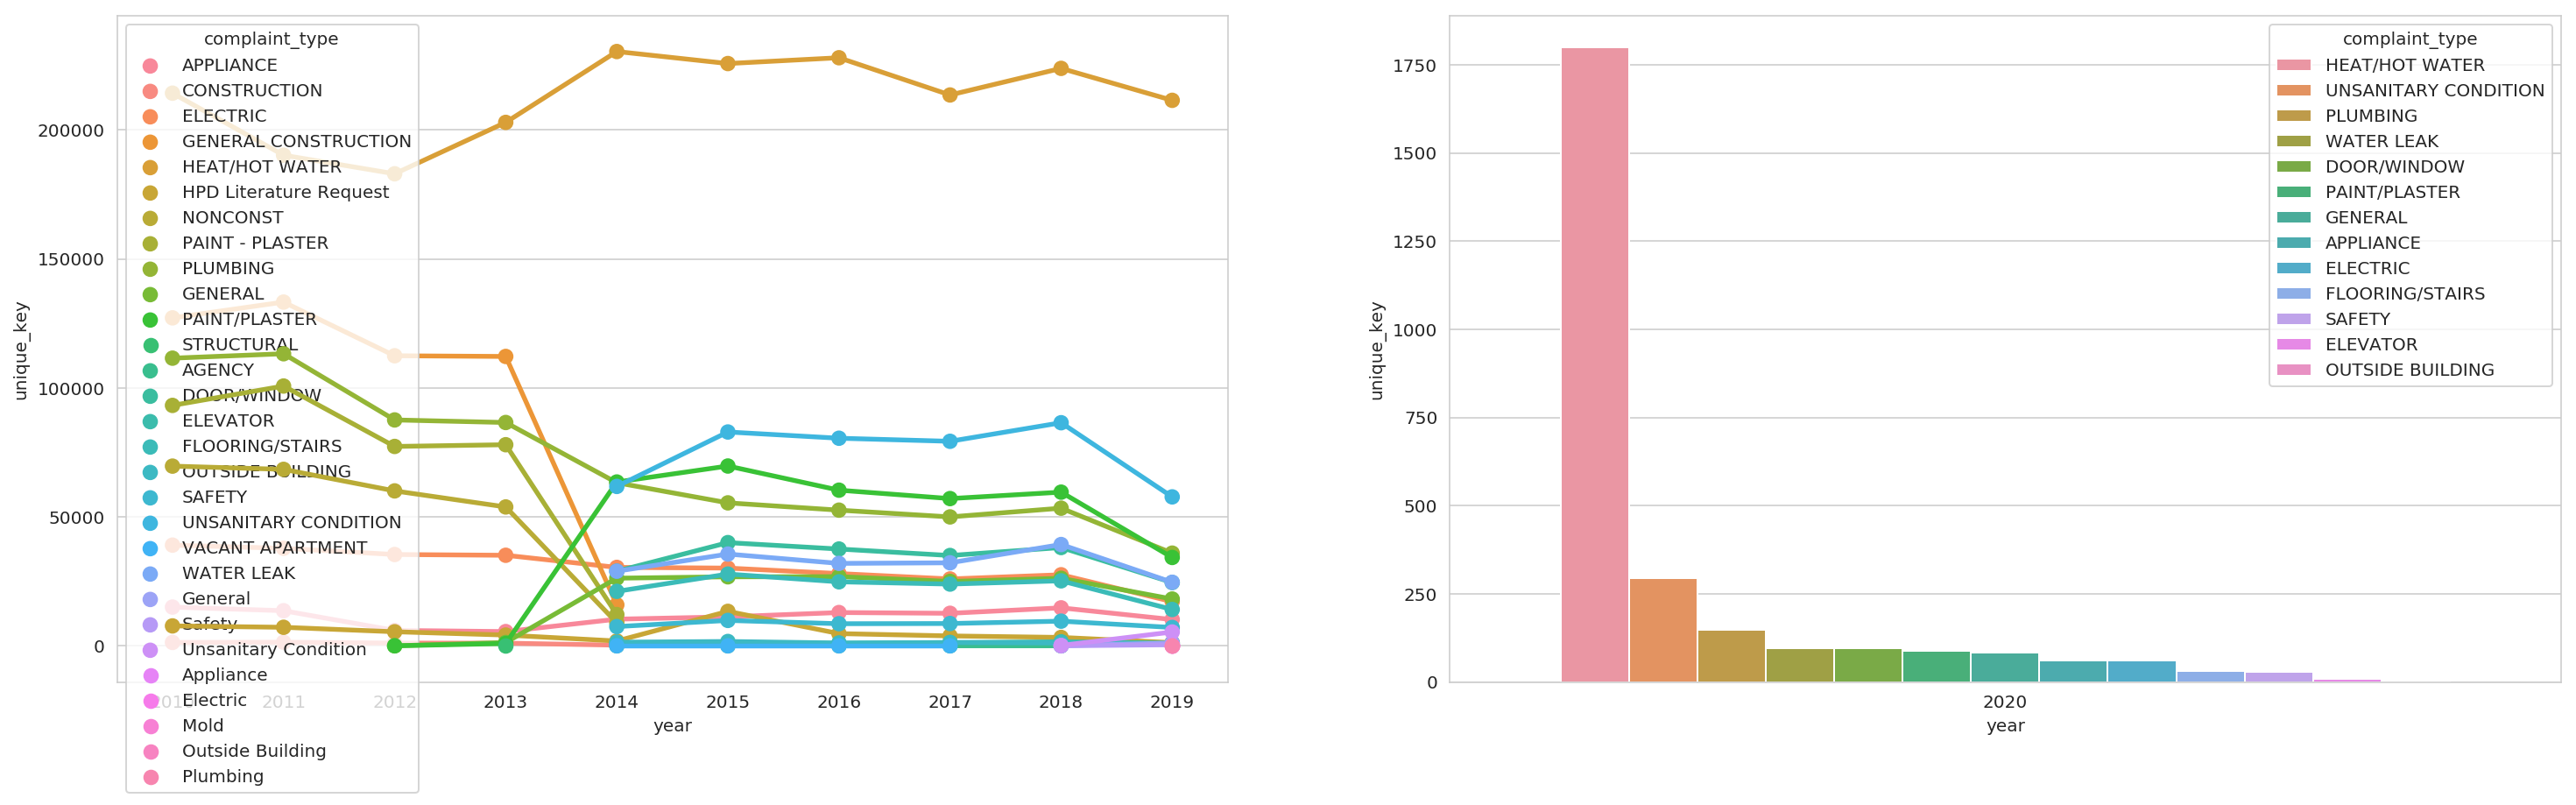

In [8]:
# 시각화해본다

pivot_complain = pd.pivot_table(index = ["year","complaint_type"], 
                                values = "unique_key", 
                                data = df_complaint, 
                                aggfunc = "count").reset_index()



# 여기서 파악해야 할 것은 현재 2020년이 얼마되지 않은 시점이기 때문에 
# 2020년의 데이터 수가 절대적으로 작은 관계로 그래프의 문제가 발생할 수 있다 
# 따라서 올바른 데이터 분석을 위해서는 2020년에 발생한 complaint은 따로 분석하거나 / 제외시킨다 
pivot_complain_2020 = pivot_complain[pivot_complain["year"] == 2020]
pivot_complain_2020 = pivot_complain_2020.sort_values(by = "unique_key",ascending = False)
pivot_complain_fix = pivot_complain[pivot_complain["year"] != 2020]
print(pivot_complain.shape)
print(pivot_complain_fix.shape)
print(pivot_complain_2020.shape)


# 2020년 제외한 그래프 
fig = plt.figure(figsize = [25,7])
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.pointplot(x = "year", y = "unique_key", hue = "complaint_type", 
                    data = pivot_complain_fix, markers = 'o')


# 2020년 한정 컴플레인 비교
order = pivot_complain_2020["complaint_type"].tolist()
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(x = "year", y = "unique_key", hue = "complaint_type", 
                  data = pivot_complain_2020)

< 문제해결 및 인사이트>

이것을 더 정확히 분석하기 위해서는 위에서 HEAT/HOT WATER 통합하는 것처럼 분리되어 있는 complaint를 통합해야 한다
하지만 제한된 정보로 인하여 진행단계에서 파악하는 작업을 해본다

1. HEAT/HOT WATER
HEAT/HOT WATER은 단 한번도 1위 밑으로 내려간 적이 없고 오히려 더 상승하고 있다.
HEAT/HOT WATER 문제는 단순히 1~2년의 문제가 아니라 장기적으로 뉴욕 부동산시장에서 제기되는 가장 큰 문제라는 점을 알 수 있다.
GENERAL CONSTRUCTION이 안정화된 2015년 이후로 건수가 급등하였고 시간이 지날수록 우하향하고 있으나 2012년 수준은 아니다
건설 이후 이부분이 해결되지 않고 오히려 늘어나고 있다는 이야기다

2. 시점
가장 주의깊게 봐야할 시점이 2013~2014년 기간이다 그리고 이 기간에 complain이 증가/감소 여부가 어떠한 것에 의한건지 중요하다
그리고 이 시기 가장 하락한 GENERAL CONSTRUCTION가 매우 중요하다

3. GENERAL CONSTRUCTION -> 전체적 감소 / PAINT/PLASTER -> 건설 이후 소폭 증가
GENERAL CONSTRUCTION의 경우 2013년까지는 문제가 많았으나 어떠한 정채긍로 인해 이것이 해결이 되어 2014년 이후로는 사라졌다
이후에는 STRUCTURAL / CONSTRUCTION가 어느정도 있으나(2014~) 그 불만 수가 전에 비해 줄어든 것은 사실이다

한편 PAINT/PLASTER는 2013년까지는 수가 적다가 2014년에 갑자기 늘어났다
문제는 2013년까지 PAINT - PLASTER란 이름으로 상위에 있었는데 다른 이름으로 나타나서 증가가 되었다는 점이다
GENERAL CONSTRUCTION의 감소와 맞물려서 일어난 경우로 건설 후 조치와 관련된 PAINT/PLASTER가 늘어났다는 점을 알 수 있고
더불어 2013~2014년 사이에 건설이 많이 일어났음을 예측해 볼 수 있다 

4. UNSANITARY CONDITIOM
UNSANITARY이 2014년에 등장했는데 이 역시 건설착공과 무관하지 않다고 본다. 

### 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In [9]:
# question1의 정답은 HEAT/HOT WATER였음으로 이것을 분석한다 
# 35% 이상이 HEAT/HOT WATER complaint이라는 점은 -> 이것을 면밀이 분석해야함을 말한다

# 실제 총 데이터와 / HEAT/HOT WATER만 추출한 데이터간에 
# boroughs, ZIP codes, or street의 변화가 있는지 파악해본다 

df_complaint["borough"].unique()
Heating = df_complaint[df_complaint["complaint_type"] == "HEAT/HOT WATER"]

print(df_complaint["borough"].unique())
print(Heating["borough"].unique())

print(len(df_complaint["street_name"].unique()))
print(len(Heating["street_name"].unique()))

print(len(df_complaint["incident_zip"].unique()))
print(len(Heating["incident_zip"].unique()))

# 파악결과 숫자의 차이는 있지만 특정지역을 제외하고서는 대부분의 지역이 HEAT/HOT WATER가 문제가 되고 있다는 것을 알 수 있다
# 즉 이 HEAT/HOT WATER은 전방위적 문제라고 보면 된다

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND' 'Unspecified']
['BROOKLYN' 'BRONX' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND' 'Unspecified']
6820
6019
203
194


#### 1) city

In [10]:
# city 결과 BRONX / BROOKLYN / NEW YORK 이 3곳이 가장 높다

numbeofcity = pd.pivot_table(index = "city", 
                           values = "unique_key",
                           data = Heating,
                           aggfunc = len).sort_values(by = "unique_key",
                                                      ascending = False).head(10)


# 따라서 이 3개의 도시가 제일 중요하고 나머지는 other로 처리를 한다

def find_city(name):
    
    if name == "BRONX":
        return "BRONX"
    if name == "BROOKLYN":
        return "BROOKLYN"
    if name == "NEW YORK":
        return "NEW YORK"
    
    else:
        return "OTHER"
    
Heating["city_fix"] = Heating["city"].apply(find_city)

numbeofcity

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,unique_key
city,
BRONX,679782
BROOKLYN,655787
NEW YORK,472563
Jamaica,21803
STATEN ISLAND,21434
Elmhurst,19683
Flushing,19253
Astoria,18969
Far Rockaway,11680


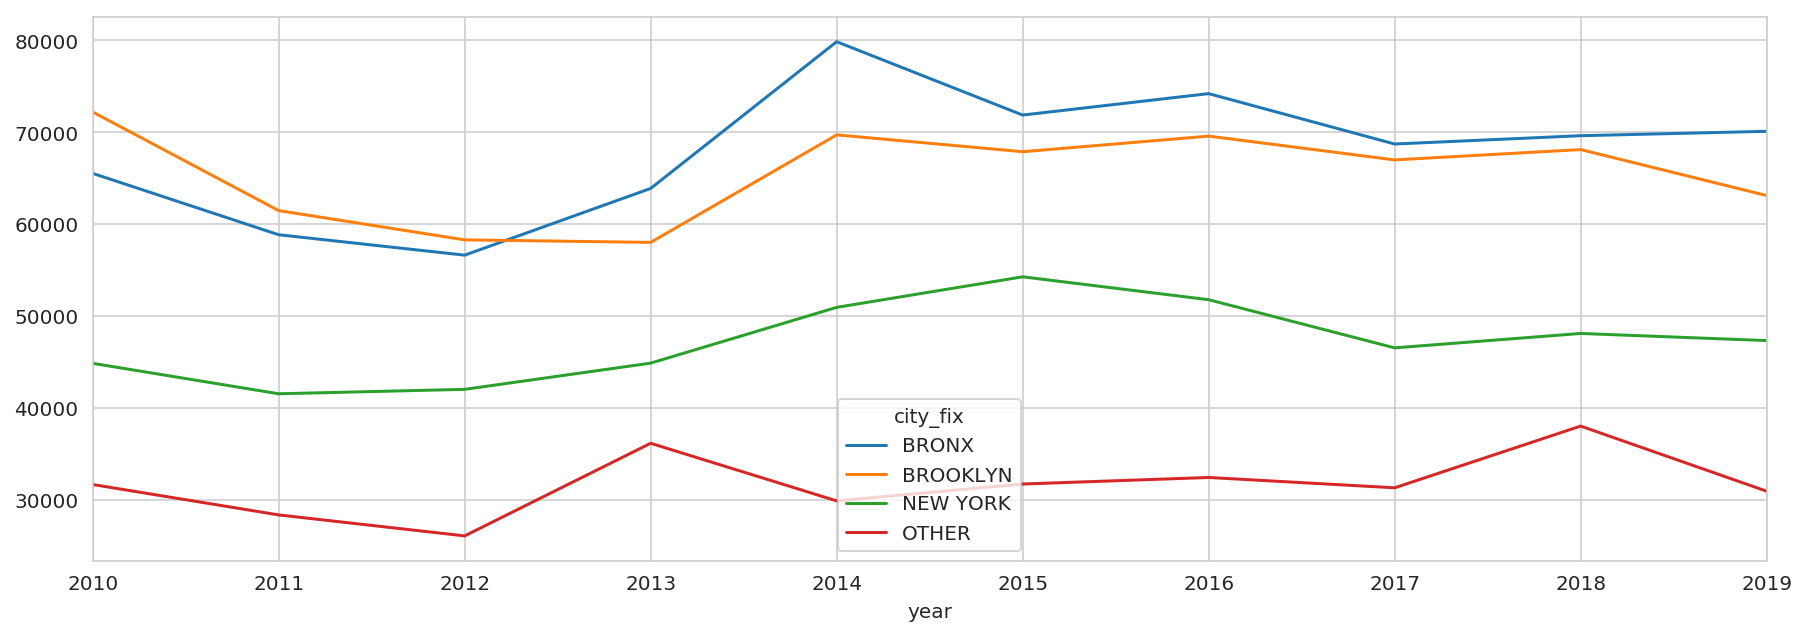

In [11]:
# 시각화를 해본다

Heating_fix = Heating[Heating["year"] != 2020]
city = ["BRONX", "BROOKLYN", "NEW YORK"]

fig, ax = plt.subplots(figsize=(15,5))
Heating_fix.groupby(["year","city_fix"])["unique_key"].count().unstack().plot(ax = ax)

2012년까지는 BROOKLYN보다 낮았으나 이후로 BRONX가 항상 위에 있고 가장 많이 일어난다

건설이 많이 일어난 2014년부터 BRONX, BROOKLYN, NEW YORK에서도 그 영향으로 complaint가 증가하였다

반대로 OTHER 지역에서는 하락했는데 이는 건설이 이 3 지역에서 많이 일어났다고 생각해 볼 수 있다

전체적인 수치는 높지만 2013~2015년과 비교를 해보았을 때 2019년에는 그 수가 지역별로 다 감소를 하였다

#### 2) street_name

In [12]:
city = ["BRONX", "BROOKLYN", "NEW YORK"]

numbeofstreet = pd.pivot_table(index = "street_name", 
                           values = "unique_key",
                           data = Heating,
                           aggfunc = len).sort_values(by = "unique_key",
                                                      ascending = False).head(10)

# 상위 10개 street 
numbeofstreet

,unique_key
street_name,
GRAND CONCOURSE,37425
BROADWAY,24294
OCEAN AVENUE,18497
MORRIS AVENUE,16246
ARDEN STREET,15937
ST NICHOLAS AVENUE,15487
AMSTERDAM AVENUE,12200
ELMHURST AVENUE,12041
BOYNTON AVENUE,11064


<checking point>

일단 street_name은 city에 비해 그 중요성이 낮다
압도적으로 차지하고 있는 특정 지역이 있는것이 아니고 여러 도시가 퍼저있기 때문에 강조성을 찾기는 힘들다

다만 체클해야할 부분은 각 상위 10개 지역의 도시를 검색해보면 
BROOKLYN이 생각보다 없다는것과 오히려 NEW YORK 관련된 street가 더 많은것이 나온다 

즉 중요성은 city보다 적을 수 있으나
특정 city를 대표하는 street_name에서 많은 사건이 일어나는 경향이 있음으로(ex:ARDEN STREET)
이를 통해 이 street_name 역시 필요한 데이터고 ML 적용시 사용해야할 컬럼이다 

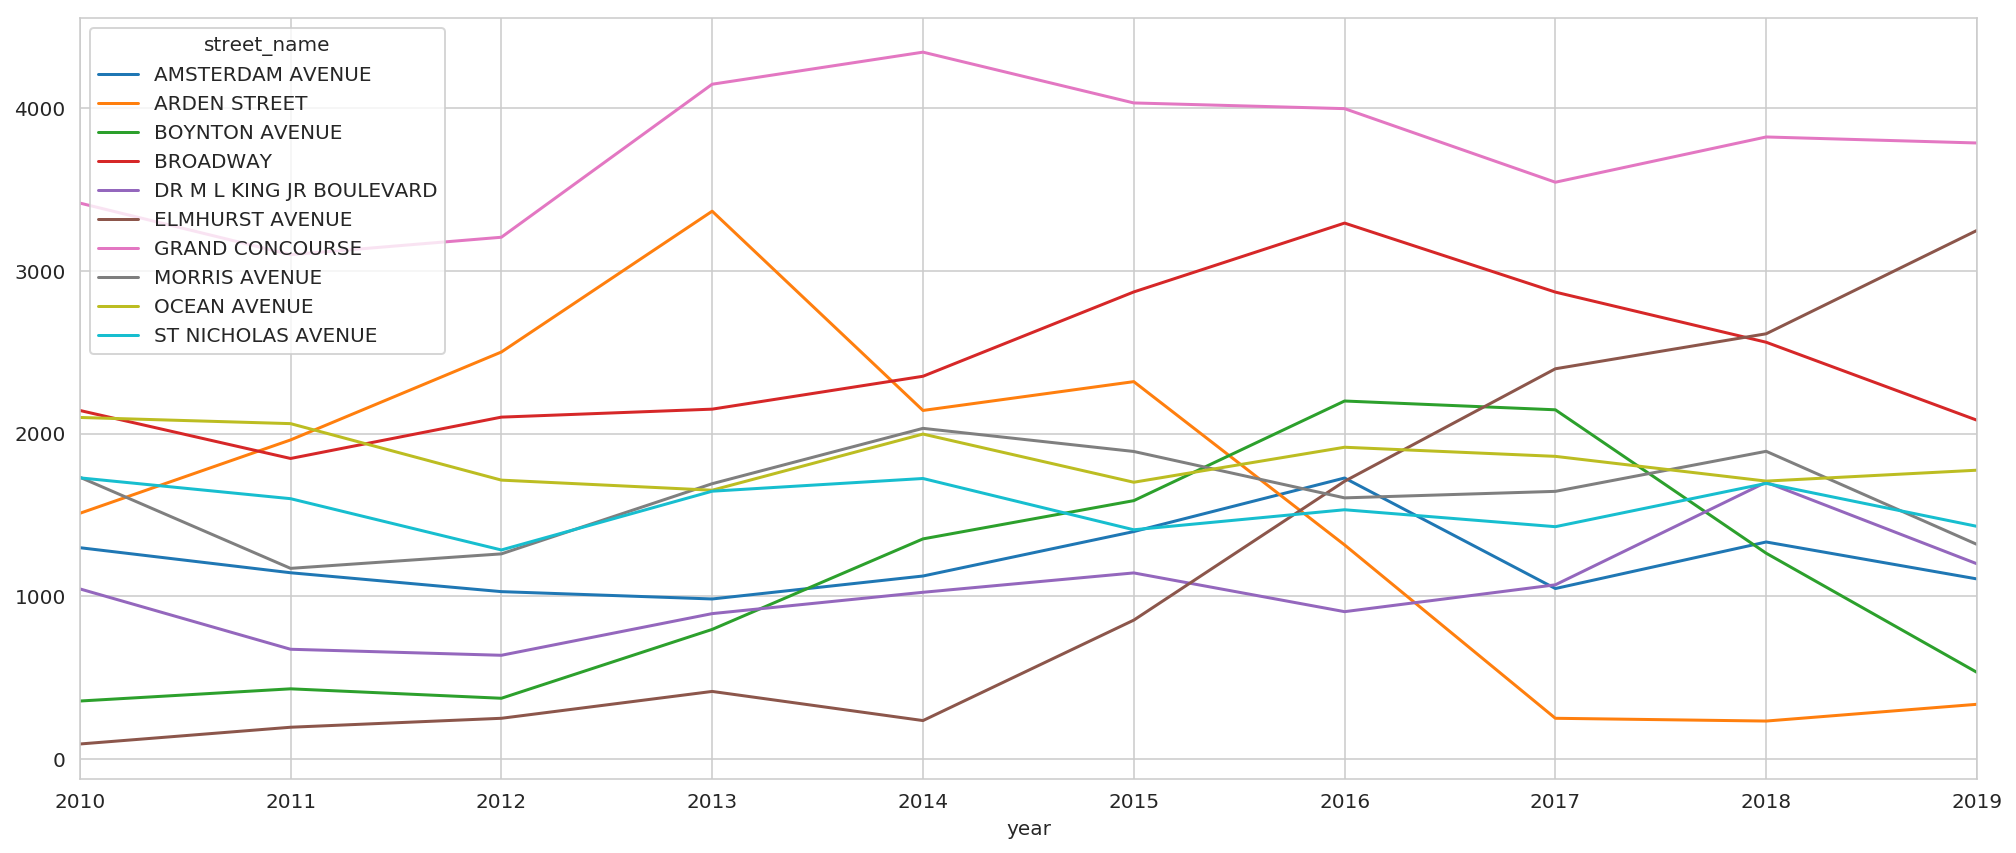

In [13]:
fig, ax = plt.subplots(figsize=(17,7))
Heating_fix[Heating_fix["street_name"]
            .isin(numbeofstreet.index)].groupby(["year", "street_name"])\
["unique_key"].count().unstack().plot(ax = ax)

#### 3) Scatterplot 

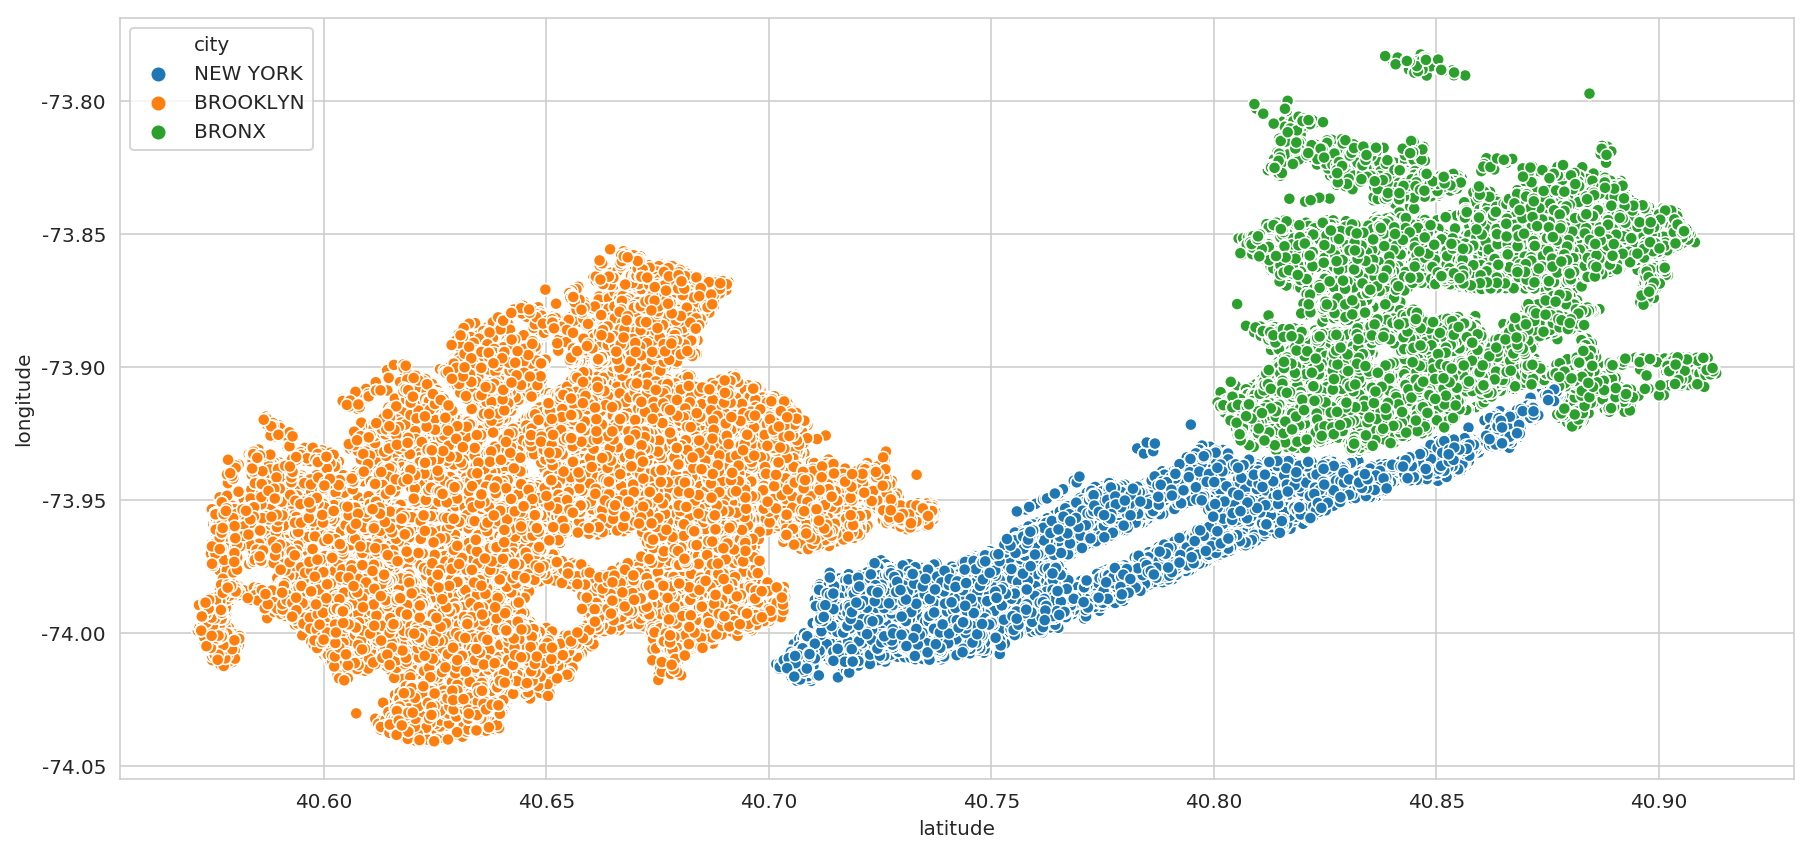

In [14]:
latitude_fix = Heating_fix["latitude"].notnull()
longitude_fix = Heating_fix["longitude"].notnull()

Heating_fix_tude2 = Heating_fix[latitude_fix & longitude_fix]

# scatterplot으로 어떻게 퍼져있는지를 파악해본다
# 이 것을 통해 2가지 사항을 파악할 수 있다
# 1) 위치(아마 전체를 다 하면 뉴욕시가 나올 것이다) / 2) 오류파악(다른 색깔의 점이 거리가 먼곳에 있다면 그것은 잘못 작성된 것이다)
# 제일 범죄가 많이 발생한 BRONX BROOKLYN NEWYORK 3개만 따로 추출해서 조사해본다
BRONX_BROOKLYN_NEWYORK = ["BRONX", "BROOKLYN", "NEW YORK"]
Heating_fix_tude2 = Heating_fix_tude2[Heating_fix_tude2["city"].isin(BRONX_BROOKLYN_NEWYORK)]


# 이를 통해 범죄가 어디쪽에서 많이 일어나는지 시각화 할 수 있다는 사실과 / MAP을 통해 다각화된 시각으로 파악해봐야 함을 알 수 있다.
plt.figure(figsize = [15,7])
sns.scatterplot(x = "latitude", y = "longitude", 
                data = Heating_fix_tude2, hue = "city")

### 3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings? And can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

In [15]:
# 문제해결을 위해 특정 데이터를 추가로 불러들인다

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0b53925c-23a8-4464-960a-85da02d0a002',
    'IBM_API_KEY_ID': '4rIPnHhlOzbD0vsq_ttrOMnwWi4n4zm8UEfl9qns01Xq',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'saeyoonoh-donotdelete-pr-kkixtxvuwsvuum',
    'FILE': 'BX_18v1.csv'
}

body = client_c79194d44692440ea25fe7579ee6c20c.get_object(Bucket='saeyoonoh-donotdelete-pr-kkixtxvuwsvuum',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bx = pd.read_csv(body)

# 필요해보이는 컬럼들만 추출해서 뽑아낸다
df_bx = df_bx[['Address','BldgArea','BldgDepth','BuiltFAR',
                'CommFAR','FacilFAR', 
                'Lot','LotArea','LotDepth','NumBldgs','NumFloors',
                'OfficeArea','ResArea','ResidFAR','RetailArea',
                'YearBuilt','YearAlter1','ZipCode', 'YCoord', 'XCoord'
                ]]

# 확인결과 제일 중요한 Address가 np.nan인건 필요가 없음으로 제거하고 / 나머지 것들은 0으로 바꿔준다
df_bx.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [16]:
df_bx = df_bx[df_bx["Address"].notnull()]
df_bx = df_bx.fillna(0)


# 한편 Address / ZipCode 중복은 혼동을 줄 수 있기 때문에 한개만 남긴다
df_bx = df_bx.drop_duplicates(subset=['Address','ZipCode'], keep='first')


# df_bx의 Address와 df_complaint의 incident_address 사이에 중복이 얼마나 되는지 파악해본다
number_Address = set(df_bx["Address"])
number_incident_address = set(df_complaint["incident_address"])

len(number_Address)

print(len(number_incident_address))
print(len(number_Address & number_incident_address))

181703
22817


In [17]:
# df_complaint 데이터와 df_bx 데이터를 병합한다
# df_complaint를 메인으로 하고 df_bx의 데이터를 병합하는 방식으로 한다
df_complaint = pd.merge(df_complaint, df_bx, left_on = "incident_address", right_on = "Address", how = "left")

# 원래대로라면 다른 데이터셋을 더 많이 가지고 와서 전부 merge하여 여러개 분석을 해야하나
# 현 주제가 영향의 여부를 물어보는 것으로 -> 머신러닝을 적용해야하기 때문에
# 일단은 병합한 Address가 있는 데이터들만 뽑아서 모델링을 해본다

df_complaint_address = df_complaint[df_complaint["Address"].notnull()]
print(df_complaint_address.shape)
df_complaint_address.head()

(1510495, 36)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,year,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,2020-01-03 11:22:36,45306898,UNSANITARY CONDITION,10457.0,2105 RYER AVENUE,RYER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.853390,-73.900691,NaN,RESIDENTIAL BUILDING,Open,2020,2105 RYER AVENUE,41735.0,88.0,3.41,0.0,6.5,155.0,12225.0,103.33,1.0,5.0,0.0,41735.0,6.02,0.0,1927.0,0.0,10457.0,250320.0,1011682.0
3,2020-01-03 12:17:28,45306793,HEAT/HOT WATER,10455.0,725 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.814229,-73.898394,NaN,RESIDENTIAL BUILDING,Open,2020,725 SOUTHERN BOULEVARD,51000.0,85.0,4.64,0.0,4.8,30.0,11000.0,110.00,1.0,6.0,0.0,51000.0,3.44,0.0,1925.0,0.0,10455.0,235998.0,1012298.0
6,2020-01-03 03:42:51,45306267,HEAT/HOT WATER,10451.0,940 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.828783,-73.921617,NaN,RESIDENTIAL BUILDING,Open,2020,940 GRAND CONCOURSE,145728.0,175.0,3.71,0.0,6.5,45.0,39250.0,182.77,1.0,6.0,0.0,145728.0,6.02,0.0,1929.0,0.0,10451.0,241220.0,1006123.0
12,2020-01-03 19:15:25,45307037,ELECTRIC,10460.0,1562 THIERIOT AVENUE,THIERIOT AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.839697,-73.865894,NaN,RESIDENTIAL BUILDING,Open,2020,1562 THIERIOT AVENUE,56250.0,90.0,4.50,0.0,4.8,24.0,12500.0,100.00,1.0,5.0,0.0,56250.0,2.43,0.0,1929.0,0.0,10460.0,245268.0,1021421.0
14,2020-01-03 08:46:03,45306678,DOOR/WINDOW,10467.0,2435 BARKER AVENUE,BARKER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862114,-73.869425,NaN,RESIDENTIAL BUILDING,Open,2020,2435 BARKER AVENUE,3900.0,78.0,1.34,0.0,4.8,42.0,2900.0,100.00,1.0,2.0,0.0,3900.0,3.44,0.0,1927.0,0.0,10467.0,253582.0,1020296.0


In [18]:
# complaint_type을 찾아내는 classifer 문제임으로 이를 증명할 수 있는 것으로 해야한다

# 추가적으로 YearBuilt가 낡을 수록 complaint_type이 더 많지 않을까하는 생각에 별도의 컬럼을 만들어본다

df_complaint_address["build_age"] = 2020 - df_complaint_address["YearBuilt"]
df_complaint_address.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,year,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,build_age
0,2020-01-03 11:22:36,45306898,UNSANITARY CONDITION,10457.0,2105 RYER AVENUE,RYER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.853390,-73.900691,NaN,RESIDENTIAL BUILDING,Open,2020,2105 RYER AVENUE,41735.0,88.0,3.41,0.0,6.5,155.0,12225.0,103.33,1.0,5.0,0.0,41735.0,6.02,0.0,1927.0,0.0,10457.0,250320.0,1011682.0,93.0
3,2020-01-03 12:17:28,45306793,HEAT/HOT WATER,10455.0,725 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.814229,-73.898394,NaN,RESIDENTIAL BUILDING,Open,2020,725 SOUTHERN BOULEVARD,51000.0,85.0,4.64,0.0,4.8,30.0,11000.0,110.00,1.0,6.0,0.0,51000.0,3.44,0.0,1925.0,0.0,10455.0,235998.0,1012298.0,95.0
6,2020-01-03 03:42:51,45306267,HEAT/HOT WATER,10451.0,940 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.828783,-73.921617,NaN,RESIDENTIAL BUILDING,Open,2020,940 GRAND CONCOURSE,145728.0,175.0,3.71,0.0,6.5,45.0,39250.0,182.77,1.0,6.0,0.0,145728.0,6.02,0.0,1929.0,0.0,10451.0,241220.0,1006123.0,91.0
12,2020-01-03 19:15:25,45307037,ELECTRIC,10460.0,1562 THIERIOT AVENUE,THIERIOT AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.839697,-73.865894,NaN,RESIDENTIAL BUILDING,Open,2020,1562 THIERIOT AVENUE,56250.0,90.0,4.50,0.0,4.8,24.0,12500.0,100.00,1.0,5.0,0.0,56250.0,2.43,0.0,1929.0,0.0,10460.0,245268.0,1021421.0,91.0
14,2020-01-03 08:46:03,45306678,DOOR/WINDOW,10467.0,2435 BARKER AVENUE,BARKER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862114,-73.869425,NaN,RESIDENTIAL BUILDING,Open,2020,2435 BARKER AVENUE,3900.0,78.0,1.34,0.0,4.8,42.0,2900.0,100.00,1.0,2.0,0.0,3900.0,3.44,0.0,1927.0,0.0,10467.0,253582.0,1020296.0,93.0


In [19]:
# complaint_type을 분석했을 때 숫자가 매우 적은 것은 실제로 존재하지 않을 가능성이 존재한다고 보고 
# 제거해주는 것이 맞다.

# stats같은 툴을 사용해 95% 범위 이하인 것을 제거하는 것도 괜찮지만 여기서는 숫자가 적은걸 제거하는 방향으로 간다
# 여기서는 complaint_type을 분석해 100개 이하인 데이터는 제거하는 방식으로 한다
from scipy import stats

number_complaint_type = df_complaint_address["complaint_type"].value_counts() > 1000
df_complaint_address = df_complaint_address[df_complaint_address["complaint_type"].
                                            isin(number_complaint_type.index)]

In [20]:
# 원래대로라면 좀더 세부적으로 분석을 진행해야 하지만, 문제의 조건이 다른 characteristic or characteristics이 영향을 서로 주는지 자체를 분석하는 것이 
# 문제의 핵심임으로 빠른 분석을 위해 일부만 발취해서 모델링 시킨다

# 이 문제는 classifier이기 때문에 분류 관련 툴을 시도해본다
feature_name = ["unique_key", "incident_zip", "latitude", "longitude", "BldgArea", "build_age"]
label_name = "complaint_type"

X = df_complaint_address[feature_name].fillna(0)
Y = df_complaint_address[label_name]


from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape) 


# 분리된 데이터가 가지고 있는 전체 unique 개수가 맞아야함으로 체크를 해준다
print(len(set(y_train)))
print(len(set(y_test)))

(1057346, 6)
(1057346,)
(453149, 6)
(453149,)
22
22


#### 1) GradientBoostingClassifier / log_loss

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, mean_squared_error, classification_report, jaccard_similarity_score

# Scaler 시켜준다
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit(x_train).transform(x_train) 
x_test = StandardScaler().fit(x_test).transform(x_test) 


# modeling
# RandomForestClassifier 보다 GradientBoostingClassifier이 더 좋은결과를 보이기에 이걸로 한다
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 10, 
                                   random_state = 42)

model.fit(x_train, y_train)
y_predict = model.predict_proba(x_test)

# metrics practice
from sklearn.metrics import log_loss


# score결과 점수가 1이하가 아님으로 현재 feature_name은 좋은 모델링이라고 볼 수 없다
# 하지만 여기서는 영향력을 조사하는 것임으로 체크차원으로 넘어간다
score = log_loss(y_test, y_predict)
score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


2.029876101021486

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# hyperparameter로 진행을 해보면 다음과 같다
# n_estimators, max_features를 hyperparameter로 선정
# n_estimators는 기본 300 이상은 해줘야 하나 / 여기서는 20로 간단하게 구한다

random_number = 20
hyperparameter_list = []
max_features = np.random.uniform(0, 1)

for n_estimators in range(1, random_number):

    model = GradientBoostingClassifier(n_estimators = n_estimators,
                                       max_features = 0.1,
                                       random_state = 42)
    
    model.fit(x_train, y_train)
    y_predict = model.predict_proba(x_test)

    score = log_loss(y_test, y_predict)
    
    hyperparameter = {"n_estimators" : n_estimators, 
                      "score" : score, 
                      "max_features" : max_features}
    hyperparameter_list.append(hyperparameter)
    
    print(f"n_estimators = {n_estimators}, score = {score}, max_features = {max_features:.6f}")

    
pd.DataFrame.from_dict(hyperparameter_list).sort_values\
(by = "score",
 ascending = True).head()

n_estimators = 1, score = 2.7369588190037537, max_features = 0.932685
n_estimators = 2, score = 2.6085203260300127, max_features = 0.932685
n_estimators = 3, score = 2.4993390736164063, max_features = 0.932685
n_estimators = 4, score = 2.4183978355862696, max_features = 0.932685
n_estimators = 5, score = 2.356959906601292, max_features = 0.932685
n_estimators = 6, score = 2.3082808266480903, max_features = 0.932685
n_estimators = 7, score = 2.2611435384818845, max_features = 0.932685
n_estimators = 8, score = 2.226703163807429, max_features = 0.932685
n_estimators = 9, score = 2.1932716249326814, max_features = 0.932685
n_estimators = 10, score = 2.168168259062491, max_features = 0.932685
n_estimators = 11, score = 2.1392543798893104, max_features = 0.932685
n_estimators = 12, score = 2.1159277630689464, max_features = 0.932685
n_estimators = 13, score = 2.0976659249496956, max_features = 0.932685
n_estimators = 14, score = 2.0786522039271174, max_features = 0.932685
n_estimators = 15,

,max_features,n_estimators,score
18,0.932685,19,2.003693
17,0.932685,18,2.013582
16,0.932685,17,2.028708
15,0.932685,16,2.045500
14,0.932685,15,2.061174


#### 2) RandomForestClassifier / feature_importance

In [24]:
# 이번에는 각 컬럼별로 label_name에 영향이 얼마나 미치는지를 조사해본다
# 이를 통해 각 characteristic or characteristics이 결과에 영향을 준다는 것을 파악할 수 있다.

from sklearn.ensemble import RandomForestClassifier


# n_estimators는 기본 300 이상은 해줘야 하나 / 여기서는 1로 간단하게 구한다
model = RandomForestClassifier(n_estimators = 1)
model.fit(x_train, y_train)

# 측정
model_estimation = model.feature_importances_
model_estimation

array([0.76765083, 0.01362525, 0.06151525, 0.06165143, 0.05805084,
       0.0375064 ])

In [29]:
# 여기서 보면 
# unique_key는 약 75%의 확률의 높은 연관성을 가지고 있어서 좋은 컬럼 혹은 변수라고 볼 수 있지만
# 그 밖에 나머지 컬럼들은 실질적으로 좋은 modeling을 하는데 좋은 feature_name은 아님을 알 수 있다
# 실제로 log_loss에서도 점수가 1이 넘어간다는 것은 under_fitting되어 있다는 이야기이기도 하다
pd.DataFrame({"columns" : X.columns.tolist(), "feature" : model_estimation})

,columns,feature
0,unique_key,0.767651
1,incident_zip,0.013625
2,latitude,0.061515
3,longitude,0.061651
4,BldgArea,0.058051
5,build_age,0.037506


#### 3) classification_report

In [30]:
# precision, recall, r2_score을 알 수 있는 classification_report 적용

y_predict = model.predict(x_test)


# 아무래도 가장 절대적인 수치가 많은 HEATING / HEAT/HOT WATER는 그만큼 예측도 높기 때문에 점수가 높으나
# 나머지들은 점수가 매우 낮음

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

                      precision    recall  f1-score   support

              AGENCY       0.00      0.00      0.00         2
           APPLIANCE       0.04      0.04      0.04      9068
        CONSTRUCTION       0.01      0.00      0.00       354
         DOOR/WINDOW       0.09      0.08      0.08     14932
            ELECTRIC       0.08      0.08      0.08     21732
            ELEVATOR       0.00      0.00      0.00       418
     FLOORING/STAIRS       0.07      0.05      0.06     10188
             GENERAL       0.07      0.06      0.06      9247
GENERAL CONSTRUCTION       0.23      0.20      0.21     40887
             General       0.09      0.07      0.08        72
      HEAT/HOT WATER       0.49      0.56      0.52    166491
            NONCONST       0.13      0.14      0.13     19528
    OUTSIDE BUILDING       0.03      0.03      0.03       355
     PAINT - PLASTER       0.19      0.16      0.17     30485
       PAINT/PLASTER       0.15      0.13      0.14     26410
       

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
